In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

### Lendo CSV

In [2]:
# Lendo csv
df = pd.read_csv("casos_attr_2016.csv")

In [3]:
# convertando booleanos para inteiros
bool_columns = [u'penalty_AGP', u'penalty_BGK', u'penalty_AVJLP', u'penalty_BGP',
                u'basic payment', u'penalty_AJLP', u'greening', u'penalty_AVGP',
                u'penalty_C16', u'penalty_B16', u'penalty_AVBP', u'selected_manually',
                u'penalty_C9', u'penalty_C4', u'penalty_B5', u'selected_random',
                u'penalty_AUVP', u'penalty_AVUVP', u'rejected', u'penalty_V5',
                u'penalty_BGKV', u'penalty_B5F', u'selected_risk', u'penalty_GP1',
                u'small farmer', u'penalty_CC', u'penalty_JLP5', u'penalty_JLP6',
                u'penalty_JLP7', u'penalty_JLP1', u'penalty_JLP2', u'penalty_JLP3',
                u'penalty_ABP', u'penalty_B6', u'penalty_B4', u'redistribution',
                u'penalty_B2', u'penalty_B3', u'young farmer']
df[bool_columns] *= 1

# removendo colunas do tipo textual
string_columns = [u'applicant', u'concept:name', u'application', u'department',
                  u'start_time', u'identity:id', u'end_time']
df = df.drop(string_columns, axis=1)

### Descrevendo atributos

In [4]:
# total de aplicações
n_rows = df.shape[0]
# total de aplicações com 'finish payment'
n_rows_f_p = df[df['finish payment'] == 1].shape[0]
# lista de atributos
attr_names = list(df.columns.values)

df_f_p = df[df['finish payment'] == 1]

# criando tabela
table = pd.DataFrame(data={u"Coluna" : attr_names})
table[u'Total de val. únicos != 0'] = [len(list(df[df[k] > .0][k])) for k in df.columns.values]
table[u" % "] = [(float(v) / n_rows) * 100 for v in df.count()]
table[u"Total de val. únicos != 0' c/ 'finish payment'"] = [len(list(df_f_p[df_f_p[k] > .0][k])) for k in df.columns.values]
table[u" %  "] = [(float(v) / n_rows_f_p) * 100 for v in df_f_p.count()]

# ordenando pelo %
table = table.sort_values([u" %  "])

In [5]:
table.head(15)

,Coluna,Total de val. únicos != 0,%,Total de val. únicos != 0' c/ 'finish payment',%
33,payment_actual3,0,0.020616,0,0.000000
2,penalty_amount3,2,0.020616,0,0.000000
27,amount_applied3,3,0.020616,0,0.000000
28,amount_applied2,50,0.357339,15,0.126807
35,penalty_amount2,43,0.357339,9,0.126807
32,payment_actual2,7,0.357339,6,0.126807
45,amount_applied1,1084,7.627817,441,3.753487
40,payment_actual1,132,7.627817,97,3.753487
31,penalty_amount1,737,7.627817,212,3.753487
51,greening,14552,100.000000,11829,100.000000


### Lista de atributos sem valores para o ano

In [6]:
# atributos nulos para ambos os tipos
table_0 =  table[table[u'Total de val. únicos != 0'] == 0]
table_0

,Coluna,Total de val. únicos != 0,%,Total de val. únicos != 0' c/ 'finish payment',%
33,payment_actual3,0,0.020616,0,0.0
55,penalty_B4,0,100.000000,0,100.0
38,penalty_B3,0,100.000000,0,100.0
54,penalty_B6,0,100.000000,0,100.0
42,penalty_B5F,0,100.000000,0,100.0
41,penalty_BGKV,0,100.000000,0,100.0
1,penalty_JLP7,0,100.000000,0,100.0
8,penalty_BGP,0,100.000000,0,100.0
12,penalty_JLP3,0,100.000000,0,100.0
15,penalty_B16,0,100.000000,0,100.0


In [7]:
# atributos nulos para as aplicações com o 'finish payment'
table_01 =  table[table[u"Total de val. únicos != 0' c/ 'finish payment'"] == 0]
table_01

,Coluna,Total de val. únicos != 0,%,Total de val. únicos != 0' c/ 'finish payment',%
33,payment_actual3,0,0.020616,0,0.0
2,penalty_amount3,2,0.020616,0,0.0
27,amount_applied3,3,0.020616,0,0.0
55,penalty_B4,0,100.000000,0,100.0
38,penalty_B3,0,100.000000,0,100.0
54,penalty_B6,0,100.000000,0,100.0
42,penalty_B5F,0,100.000000,0,100.0
41,penalty_BGKV,0,100.000000,0,100.0
1,penalty_JLP7,0,100.000000,0,100.0
8,penalty_BGP,0,100.000000,0,100.0


## Listando apenas atributos "válidos"

In [8]:
atributos = list(table[table[u"Total de val. únicos != 0' c/ 'finish payment'"] > 0][u'Coluna'])

new_df = df[atributos]

# total de aplicações
n_rows = new_df.shape[0]
# total de aplicações com 'finish payment'
n_rows_f_p = new_df[new_df['finish payment'] == 1].shape[0]

df_f_p = new_df[new_df['finish payment'] == 1]

# criando tabela
table_2 = pd.DataFrame(data={u"Coluna" : atributos})
table_2[u'Total de val. únicos != 0'] = [len(list(new_df[new_df[k] > .0][k])) for k in atributos]
table_2[u" % "] = [(float(v) / n_rows) * 100 for v in new_df.count()]
table_2[u'Avg'] = [new_df[new_df[k] > .0][k].mean() for k in atributos]
table_2[u'Max'] = [new_df[new_df[k] > .0][k].max() for k in atributos]
table_2[u'Min'] = [new_df[new_df[k] > .0][k].min() for k in atributos]
table_2[u"Total de val. únicos != 0' c/ 'finish payment'"] = [len(list(df_f_p[df_f_p[k] > .0][k])) for k in atributos]
table_2[u" %  "] = [(float(v) / n_rows_f_p) * 100 for v in df_f_p.count()]
table_2[u'Avg '] = [df_f_p[df_f_p[k] > .0][k].mean() for k in atributos]
table_2[u'Max '] = [df_f_p[df_f_p[k] > .0][k].max() for k in atributos]
table_2[u'Min '] = [df_f_p[df_f_p[k] > .0][k].min() for k in atributos]
table_2[u'Var '] = [df_f_p[df_f_p[k] > .0][k].var() for k in atributos]

# ordenando pela variiancia
table_2 = table_2.sort_values([u'Var '], ascending=False)
table_2.head(20)

,Coluna,Total de val. únicos != 0,%,Avg,Max,Min,Total de val. únicos != 0' c/ 'finish payment',%,Avg,Max,Min,Var
3,amount_applied1,1084,7.627817,69482.153718,608980.200000,480.920000,441,3.753487,56069.171451,608980.200000,620.5200,8.491716e+09
0,amount_applied2,50,0.357339,100649.083200,587738.820000,942.810000,15,0.126807,45960.455333,155480.530000,942.8100,1.492121e+09
45,amount_applied0,14502,100.000000,24227.632917,587738.820000,105.280000,11788,100.000000,18426.684567,587738.820000,105.2800,1.270255e+09
14,payment_actual0,14551,100.000000,24024.241845,587989.470000,5.800000,11829,100.000000,18269.455290,587913.630000,5.8000,1.262792e+09
4,payment_actual1,132,7.627817,1723.645530,21250.480000,3.690000,97,3.753487,1456.379278,21250.480000,3.6900,1.065472e+07
5,penalty_amount1,737,7.627817,950.084858,27710.400000,2.950000,212,3.753487,1026.991274,11152.150000,6.7300,3.529072e+06
18,penalty_amount0,3368,100.000000,524.953480,27710.450000,0.020000,2365,100.000000,467.098338,16670.930000,0.0200,1.521294e+06
1,penalty_amount2,43,0.357339,1142.908605,7762.570000,72.710000,9,0.126807,658.556667,3610.950000,72.7100,1.282599e+06
2,payment_actual2,7,0.357339,184.781429,616.620000,13.480000,6,0.126807,179.658333,616.620000,13.4800,5.260423e+04
37,area,14500,100.000000,68.205280,561.933100,1.079200,11785,100.000000,55.336780,561.933100,1.0792,4.789347e+03


### Verificando a Importância das variáveis considerando apenas os atributos 'válidos'

In [9]:
# removendo colunas com NAN
new_df = new_df.dropna(axis=1, how='any')

# movendo coluna 'finish payment' para o final
cols = list(new_df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('finish payment')) #Remove b from list
new_df = new_df[cols + ['finish payment']]

# Copiando os dados do csv
data = new_df.values.copy()

# Separando atributos de classes
x = data[:, :-1]  # x tem apenas valores entre a primeira e penúltima coluna
y = data[:, -1]  # y tem os valores da última coluna
y = [1 if i else 0 for i in y]

# 70% dos dados serão utilizados para treinamento e 30% para o teste
# A divisão será estratificada, serão mantidas as proporções de spam e não spam em cada grupo
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, train_size=0.7, stratify=y)

/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [10]:
x_treino.shape

(10186, 41)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Classificando com uma floresta árvores de decisão
cls_rf = RandomForestClassifier(n_estimators=100)
cls_rf.fit(x_treino, y_treino)
y_pred_rf = cls_rf.predict(x_teste)

print "Floresta árvores de decisão"
print classification_report(y_pred_rf, y_teste)

Floresta árvores de decisão
             precision    recall  f1-score   support

          0       0.94      0.87      0.91       886
          1       0.97      0.99      0.98      3480

avg / total       0.96      0.96      0.96      4366



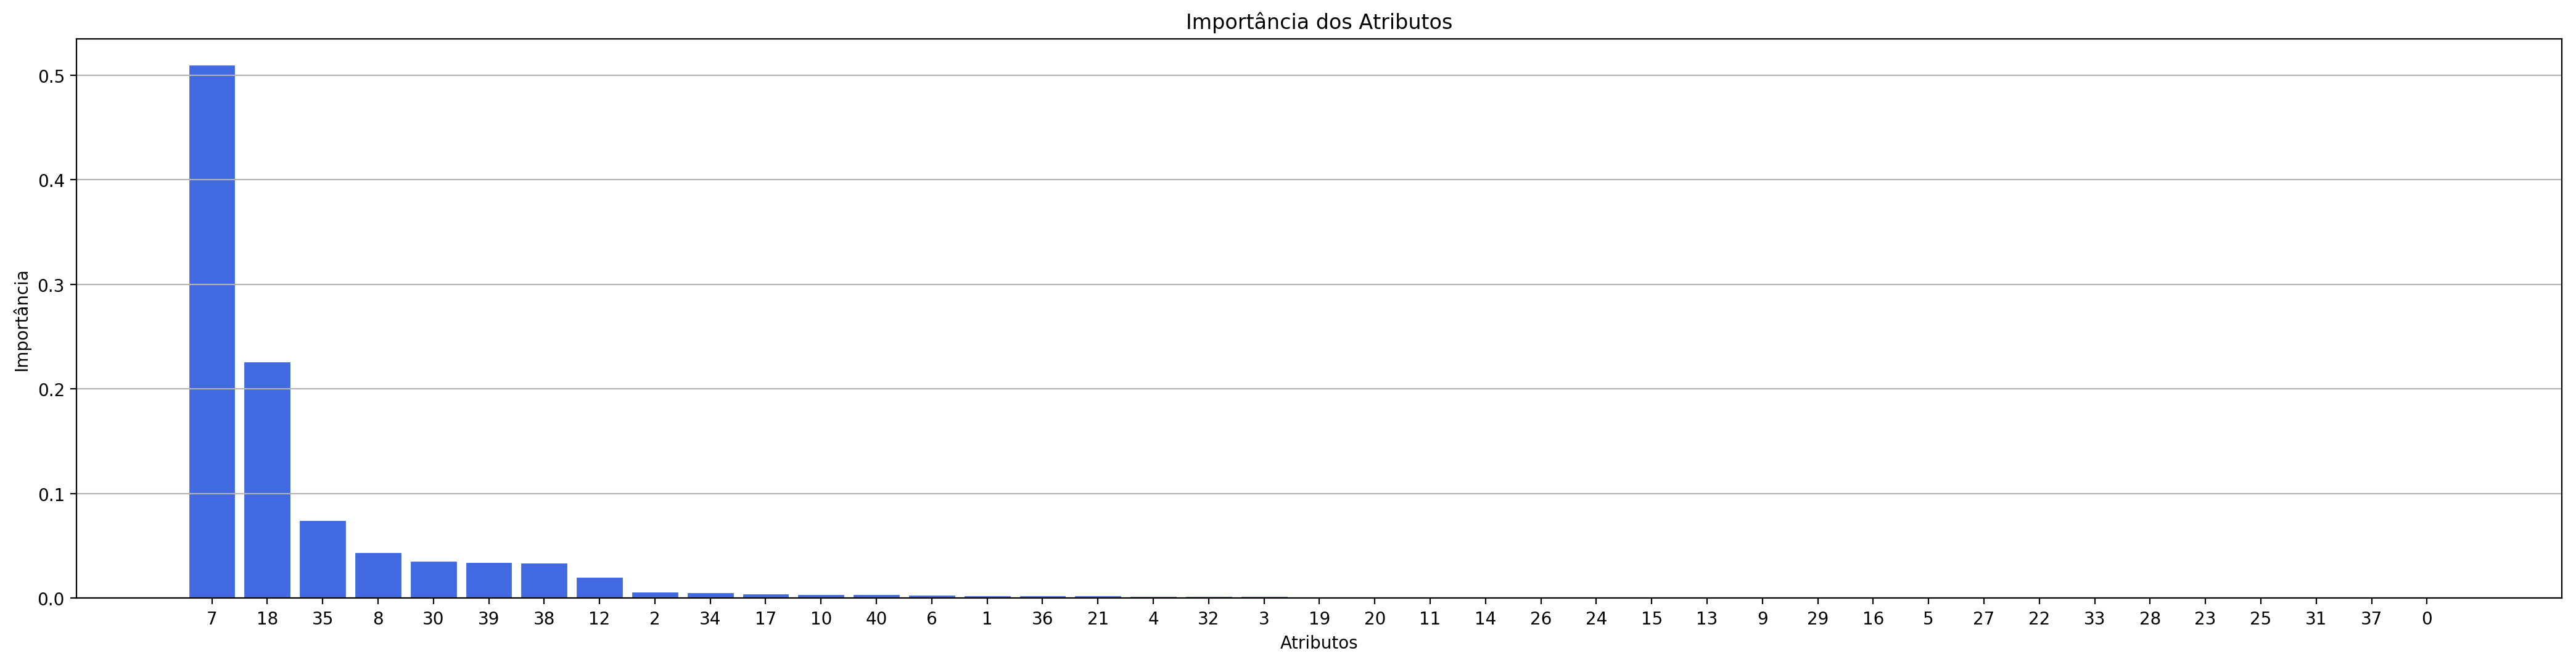

In [12]:
importances = cls_rf.feature_importances_
indices =  np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(26, 6), dpi=200)
plt.title(u"Importância dos Atributos")
plt.grid(b=True, which='both', color='0.7',linestyle='-', axis='y')
plt.xticks(range(len(indices)), indices)
plt.bar(range(len(indices)), importances[indices], color="#4169E1", align="center",edgecolor="#4169E1")
plt.xlabel(u"Atributos")
plt.ylabel(u"Importância")
plt.show()

In [13]:
colunas = list(new_df.columns.values)
for i in indices[:20]:
    print i, colunas[i]

7 delta_time
18 avg_event_interval
35 tot_events
8 payment_actual0
30 area
39 number_parcels
38 amount_applied0
12 penalty_amount0
2 penalty_B2
34 cross_compliance
17 selected_random
10 penalty_GP1
40 young farmer
6 penalty_CC
1 selected_risk
36 penalty_C4
21 penalty_BGK
4 rejected
32 selected_manually
3 penalty_B5
